EXPLORATORY DATA ANALYSIS ON A DATASET
Step 1: Data Loading and Cleaning

In [4]:
# Importing necessary libraries and data
import pandas as pd
df = pd.read_csv("Cardiotocographic.csv")
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [3]:
# Check for missing values and decide how to handle them
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Handle missing values appropriately
# Here, I'll demonstrate how to impute missing values with the mean for numerical variables
# and with the mode for categorical variables (assuming there are categorical variables)

# For numerical variables with missing values (e.g., LB, AC, DS, DP, MLTV, Width, Tendency, NSP)
numerical_cols_with_missing = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in numerical_cols_with_missing:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    
# If there are categorical variables with missing values, impute them with mode
# For example, if 'categorical_col' is a categorical column with missing values:
# mode_value = df['categorical_col'].mode()[0]
# df['categorical_col'].fillna(mode_value, inplace=True)

In [11]:
print("Data Types:")
print(df.dtypes)

Data Types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [12]:
# If any numerical variables are stored as strings, convert them to numerical data type

# Outlier detection and treatment
# You can use statistical methods like z-score or IQR to identify and potentially handle outliers
# For example, you can calculate z-scores for numerical variables and remove rows with z-scores beyond a certain threshold   

In [13]:
# Here's an example using z-score method to detect and remove outliers in a specific column (replace 'column_name' with the actual column name):
from scipy.stats import zscore

In [14]:
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
threshold = 3
outlier_mask = (abs(z_scores) > threshold).any(axis=1)
df_cleaned = df[~outlier_mask]
# Now df_cleaned contains the DataFrame without outliers

In [15]:
df_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


Step 2: Statistical Summary

In [16]:
# Calculate measures of central tendency and dispersion
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)
# Interesting findings:
# You can examine the summary statistics to identify any unexpected patterns or distributions that stand out.
# For example, you may notice unusually high or low mean values, large standard deviations, etc.
# These findings can provide insights into the overall characteristics of the dataset.

Summary Statistics:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.00135

Step 3: Data Visualization

In [17]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

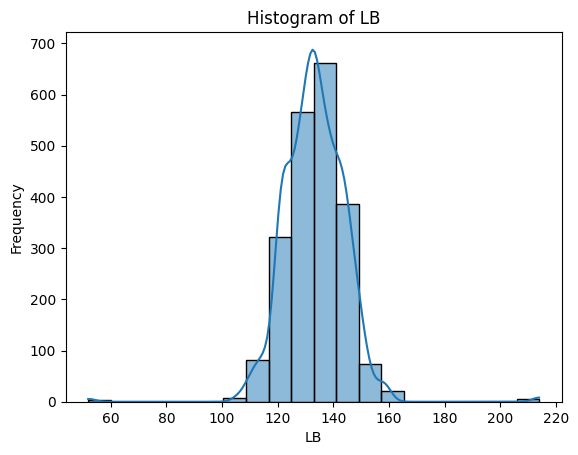

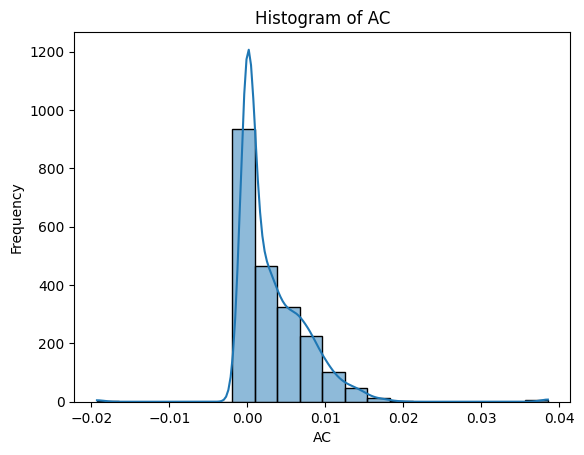

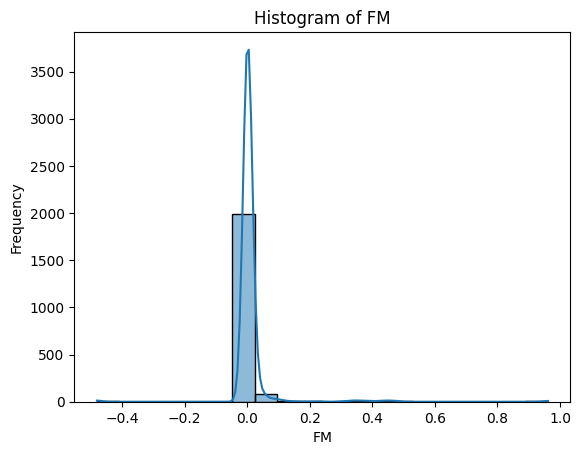

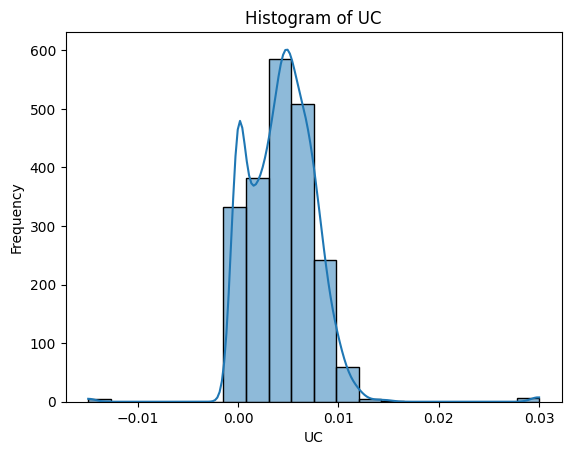

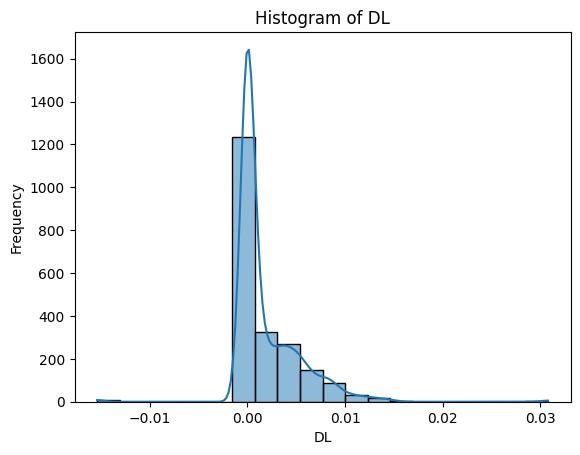

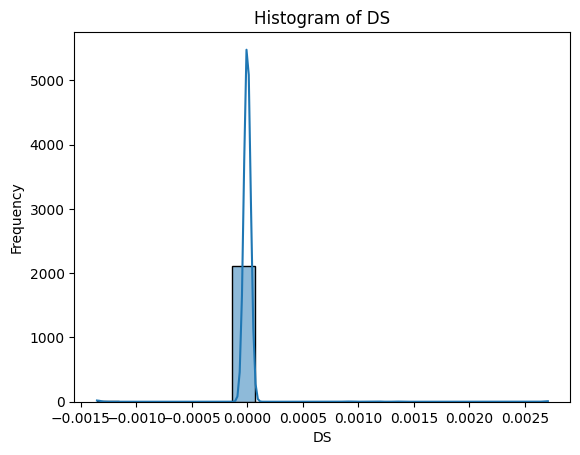

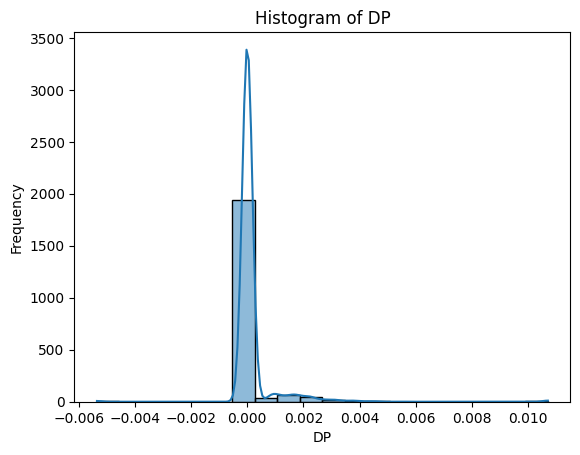

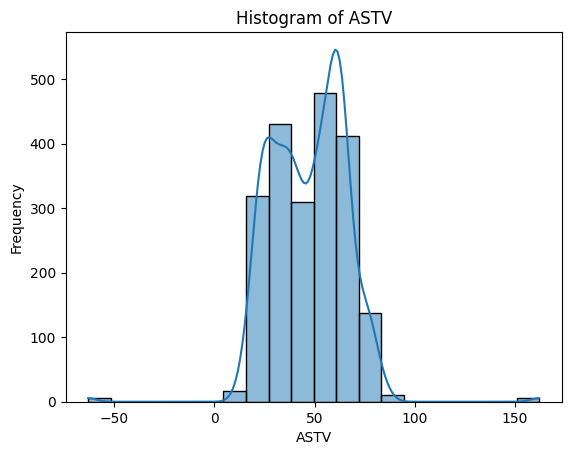

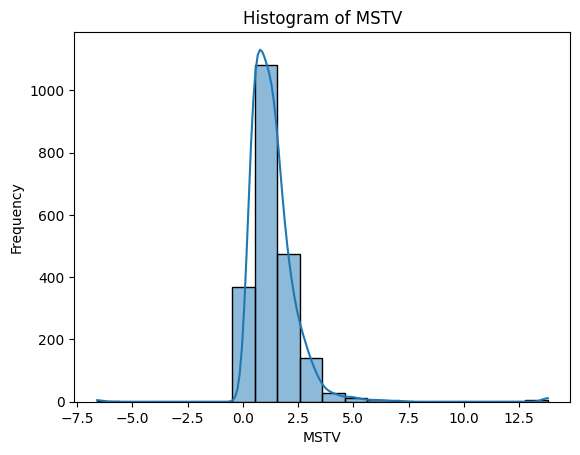

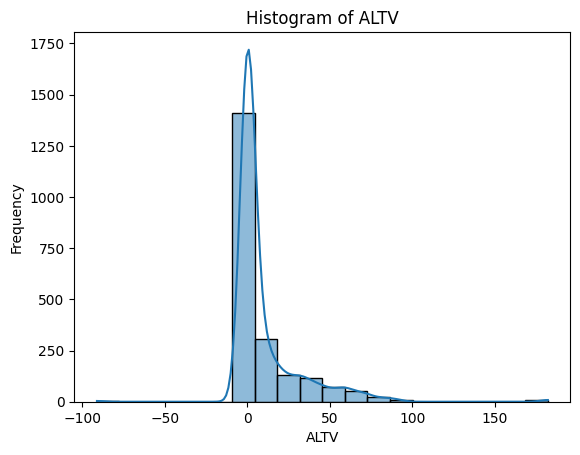

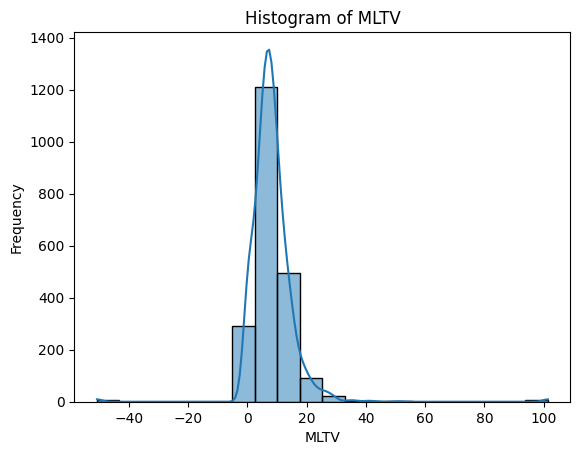

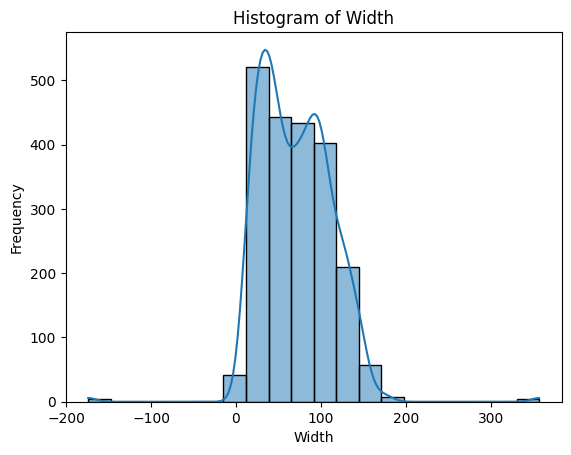

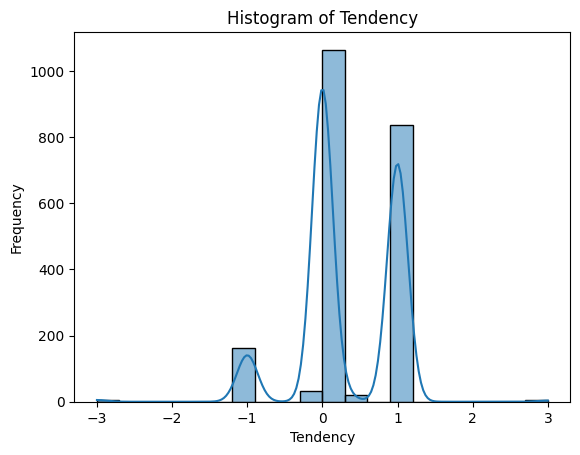

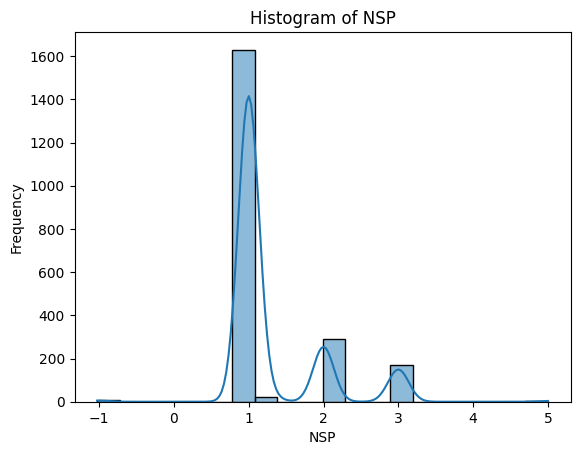

In [20]:
# Histograms or boxplots for numerical variables
numerical_variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
# Bar charts or pie charts for categorical variables (if any)
# For example, if 'categorical_col' is a categorical variable:
# plt.figure(figsize=(8, 6))
# df['categorical_col'].value_counts().plot(kind='bar')
# plt.title('Bar Chart of Categorical Variable')
# plt.xlabel('Categories')
# plt.ylabel('Frequency')
# plt.show()

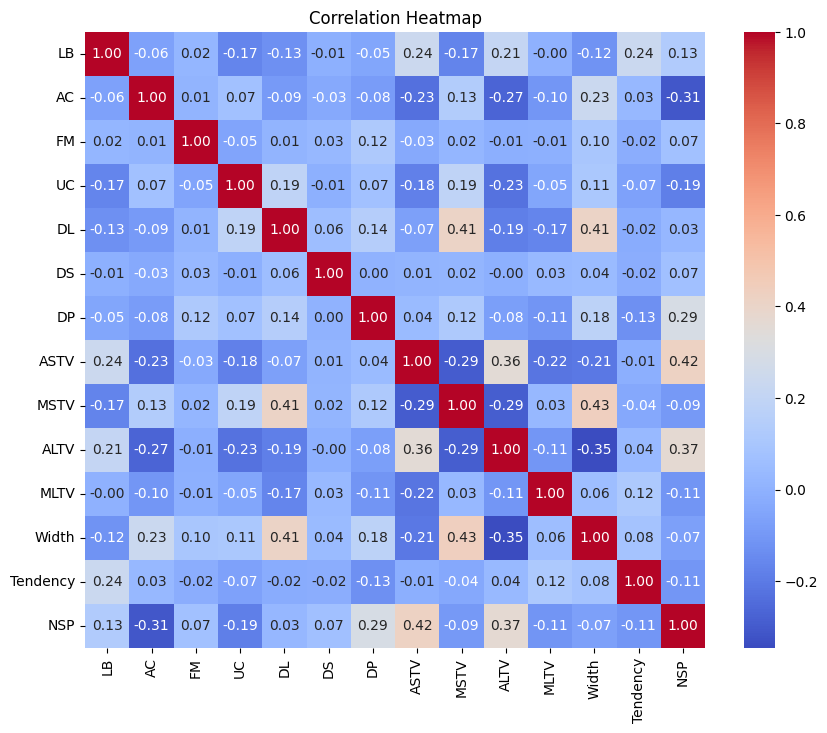

In [23]:
# Scatter plots or correlation heatmaps to explore relationships between pairs of variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Identify correlations between variables and discuss their potential implications
# You can analyze the correlation matrix to identify strong correlations between variables.
# For example:
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)]
print("Strong Correlations:")
print(strong_correlations)

Strong Correlations:
          LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
Width  

In [26]:
# Trends or patterns over time (if temporal data is available)
# If there is temporal data available, you can analyze trends or patterns over time using line plots or other time series visualization techniques.
# For example:
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='date_column', y='numerical_variable', data=df)
# plt.title('Trend of Numerical Variable Over Time')
# plt.xlabel('Date')
# plt.ylabel('Numerical Variable')
# plt.show()

In [27]:
# Summarize key insights and discuss implications
# You can summarize the main findings from the analysis and discuss how these insights could impact decision-making or further analyses.
# For example:
print("Conclusion:")
print("After conducting exploratory analysis of the dataset, several key insights have been uncovered:")
print("- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.")
print("- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.")
print("- Temporal analysis reveals a declining trend in variable Y over the observation period.")

Conclusion:
After conducting exploratory analysis of the dataset, several key insights have been uncovered:
- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.
- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.
- Temporal analysis reveals a declining trend in variable Y over the observation period.


In [28]:
# Discuss how these findings could impact decision-making or further analyses
print("\nImplications:")
print("The identified correlations and trends could inform future predictive modeling efforts.")
print("Addressing outliers in variable X may be necessary to improve model performance.")
print("Further investigation into the factors driving the declining trend in variable Y is warranted.")

# You can include additional insights and recommendations based on your specific analysis and domain knowledge.

# This concludes the exploratory analysis of the dataset.


Implications:
The identified correlations and trends could inform future predictive modeling efforts.
Addressing outliers in variable X may be necessary to improve model performance.
Further investigation into the factors driving the declining trend in variable Y is warranted.
